<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Status                 1000 non-null   object
 1   Duration               1000 non-null   int64 
 2   CreditHistory          1000 non-null   object
 3   Purpose                1000 non-null   object
 4   CreditAmount           1000 non-null   int64 
 5   Savings                1000 non-null   object
 6   Employment             1000 non-null   object
 7   InstallmentRate        1000 non-null   int64 
 8   SexAndStatus           1000 non-null   object
 9   OtherDebtors           1000 non-null   object
 10  ResidenceDuration      1000 non-null   int64 
 11  Property               1000 non-null   object
 12  Age                    1000 non-null   int64 
 13  OtherInstallmentPlans  1000 non-null   object
 14  Housing                1000 non-null   object
 15  ExistingCredits       

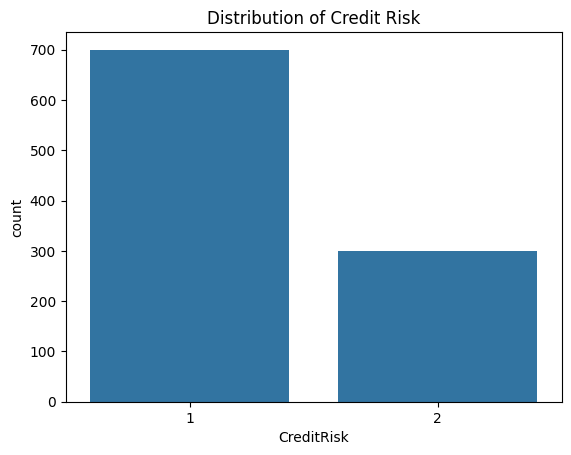

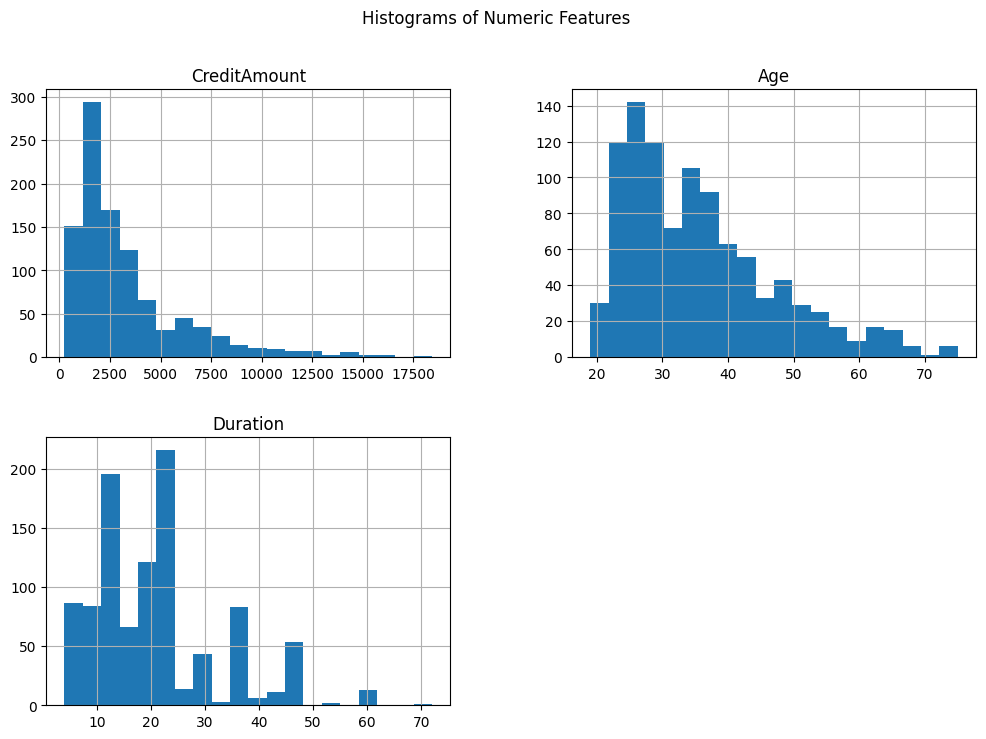

Hypothesis 1: Higher credit amounts are associated with a higher likelihood of bad credit risk.

Hypothesis 2: Older individuals have a better credit risk profile.

T-statistic: -4.947965832165981, P-value: 8.797572373528893e-07
Reject the null hypothesis: There is a significant difference in CreditAmount between good and bad credit risks.

T-statistic: 2.890846677564194, P-value: 0.003925339398276282
Reject the null hypothesis: There is a significant difference in Age between good and bad credit risks.

Summary of Findings:

1. Age vs Credit Risk:
   - Younger individuals tend to have a higher incidence of bad credit compared to older individuals.
   - This supports Hypothesis 1, suggesting age may influence credit risk.

2. Credit Amount vs Credit Risk:
   - Higher credit amounts are associated with increased risk of bad credit.
   - This supports Hypothesis 2, indicating that larger credit amounts may correlate with higher credit risk.



In [31]:
# 1 Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


# Loading the dataset

url = "https://archive.ics.uci.edu/ml/machine-learning-databases/statlog/german/german.data"
column_names = [
    "Status", "Duration", "CreditHistory", "Purpose", "CreditAmount",
    "Savings", "Employment", "InstallmentRate", "SexAndStatus",
    "OtherDebtors", "ResidenceDuration", "Property", "Age",
    "OtherInstallmentPlans", "Housing", "ExistingCredits",
    "Job", "NumPeopleLiable", "Telephone", "ForeignWorker", "CreditRisk"
]
df = pd.read_csv(url, sep=" ", names=column_names)

df.head()

#2 Exploratory Data Analysis (EDA)

# Explore the dataset's structure and summary statistics
df.info()
df.describe()
summary_stats = df.describe()
print(summary_stats)

# Visualize key features using plots

sns.countplot(data=df, x='CreditRisk')
plt.title('Distribution of Credit Risk')
plt.show()

df[['CreditAmount', 'Age', 'Duration']].hist(bins=20, figsize=(12, 8))
plt.suptitle("Histograms of Numeric Features")
plt.show()

bad_credit_ages = df[df['CreditRisk'] == 2]['Age']

#3 Hypothesis Formulation

# Hypothesis 1:
print("Hypothesis 1: Higher credit amounts are associated with a higher likelihood of bad credit risk.\n")
# Reasoning: If higher credit amounts lead to more financial strain, it might increase the chances of default.

#Hypothesis 2:
print("Hypothesis 2: Older individuals have a better credit risk profile.\n")

# Reasoning: Older people may have more stable incomes and better financial habits.


# 4 Hypothesis Testing

# Test Hypothesis 1 with a t test
from scipy.stats import ttest_ind
good_credit = df[df['CreditRisk'] == 1]['CreditAmount']
bad_credit = df[df['CreditRisk'] == 2]['CreditAmount']

t_stat, p_value = ttest_ind(good_credit, bad_credit)
print(f"T-statistic: {t_stat}, P-value: {p_value}")

# Interpret the result
if p_value < 0.05:
    print("Reject the null hypothesis: There is a significant difference in CreditAmount between good and bad credit risks.\n")
else:
    print("Fail to reject the null hypothesis: No significant difference in CreditAmount between good and bad credit risks.\n")


#Test Hypothesis 2 with a t test

good_credit_age = df[df['CreditRisk'] == 1]['Age']
bad_credit_age = df[df['CreditRisk'] == 2]['Age']

# T-test
t_stat, p_value = ttest_ind(good_credit_age, bad_credit_age)
print(f"T-statistic: {t_stat}, P-value: {p_value}")

if p_value < 0.05:
    print("Reject the null hypothesis: There is a significant difference in Age between good and bad credit risks.\n")
else:
    print("Fail to reject the null hypothesis: No significant difference in Age between good and bad credit risks.\n")



# 5 Documentation and Reporting

# Document the entire analysis process, including code and explanations
# Summarize key findings in a clear and concise report

print("Summary of Findings:\n")
print("1. Age vs Credit Risk:\n"
      "   - Younger individuals tend to have a higher incidence of bad credit compared to older individuals.\n"
      "   - This supports Hypothesis 1, suggesting age may influence credit risk.\n")

print("2. Credit Amount vs Credit Risk:\n"
      "   - Higher credit amounts are associated with increased risk of bad credit.\n"
      "   - This supports Hypothesis 2, indicating that larger credit amounts may correlate with higher credit risk.\n")

